In [1]:
!pwd
#/tf/capstone2/src

/tf/capstone2/src


In [27]:
from image_pipeline import *
from image_convolv import *
from bc import *

In [3]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel 
from skimage.feature._canny import canny
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle
from skimage.transform import resize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pdb

In [4]:
#imgs = get_images()


In [5]:
root_dir = '../data/BreaKHis_v1/histology_slides/breast'
image_size = (200, 300, 3)

ip = read_images(root_dir)
ip.resize(shape = image_size)

Invalid sub_dirs data type: <class 'list'>. List expected
root dir ../data/BreaKHis_v1/histology_slides/breast
traverse ../data/BreaKHis_v1/histology_slides/breast	 ['benign', 'malignant']	 3
fldr ['breast']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name breast w subdirs list ['40X']
compare dir_name breast w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign	 ['SOB']	 7
fldr ['benign']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name benign w subdirs list ['40X']
compare dir_name benign w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB	 ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma']	 1
fldr ['SOB']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB w subdirs list ['40X']
compare dir_name SOB w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis	 ['SOB_B_A_14-22549AB', 'SOB_B_A_14-22549CD', 'SOB_B_A_14-22549G', 'SOB_B_A_14-29960CD']	 

len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-21998CD	 ['100X', '200X', '400X', '40X']	 0
fldr ['SOB_B_F_14-21998CD']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB_B_F_14-21998CD w subdirs list ['40X']
compare dir_name SOB_B_F_14-21998CD w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-21998CD/100X	 []	 31
fldr ['100X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 100X w subdirs list ['40X']
compare dir_name 100X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-21998CD/200X	 []	 37
fldr ['200X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 200X w subdirs list ['40X']
compare dir_name 200X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-21998CD/400X	 []	 32
fldr ['400X']
raw sd names ['40X'] and data type <class 

len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor	 ['SOB_B_PT_14-21998AB', 'SOB_B_PT_14-22704', 'SOB_B_PT_14-29315EF']	 0
fldr ['phyllodes_tumor']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name phyllodes_tumor w subdirs list ['40X']
compare dir_name phyllodes_tumor w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-21998AB	 ['100X', '200X', '400X', '40X']	 0
fldr ['SOB_B_PT_14-21998AB']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB_B_PT_14-21998AB w subdirs list ['40X']
compare dir_name SOB_B_PT_14-21998AB w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-21998AB/100X	 []	 66
fldr ['100X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 100X w subdirs list ['40X']
compare dir_name 100X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumo

len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB	 ['100X', '200X', '400X', '40X']	 0
fldr ['SOB_B_TA_14-21978AB']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB_B_TA_14-21978AB w subdirs list ['40X']
compare dir_name SOB_B_TA_14-21978AB w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/100X	 []	 18
fldr ['100X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 100X w subdirs list ['40X']
compare dir_name 100X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/200X	 []	 17
fldr ['200X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 200X w subdirs list ['40X']
compare dir_name 200X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/400X	 []	 14
fldr ['400X']
raw sd names ['40X'] an

traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-13412/200X	 []	 32
fldr ['200X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 200X w subdirs list ['40X']
compare dir_name 200X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-13412/400X	 []	 26
fldr ['400X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 400X w subdirs list ['40X']
compare dir_name 400X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-13412/40X	 []	 32
fldr ['40X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 40X w subdirs list ['40X']
compare dir_name 40X w ea sd 40X
valid subdir 40X
image name 0 ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-13412/40X/SOB_M_DC-14-13412-40-001.png
len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/maligna

len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15792	 ['100X', '200X', '400X', '40X']	 0
fldr ['SOB_M_DC_14-15792']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB_M_DC_14-15792 w subdirs list ['40X']
compare dir_name SOB_M_DC_14-15792 w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15792/100X	 []	 14
fldr ['100X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 100X w subdirs list ['40X']
compare dir_name 100X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15792/200X	 []	 12
fldr ['200X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 200X w subdirs list ['40X']
compare dir_name 200X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15792/400X	 []	 15
fldr ['400X']
raw sd names ['40X'] 

len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17614	 ['100X', '200X', '400X', '40X']	 0
fldr ['SOB_M_DC_14-17614']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB_M_DC_14-17614 w subdirs list ['40X']
compare dir_name SOB_M_DC_14-17614 w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17614/100X	 []	 29
fldr ['100X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 100X w subdirs list ['40X']
compare dir_name 100X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17614/200X	 []	 33
fldr ['200X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 200X w subdirs list ['40X']
compare dir_name 200X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17614/400X	 []	 28
fldr ['400X']
raw sd names ['40X'] 

len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2980	 ['100X', '200X', '400X', '40X']	 0
fldr ['SOB_M_DC_14-2980']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB_M_DC_14-2980 w subdirs list ['40X']
compare dir_name SOB_M_DC_14-2980 w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2980/100X	 []	 25
fldr ['100X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 100X w subdirs list ['40X']
compare dir_name 100X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2980/200X	 []	 21
fldr ['200X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 200X w subdirs list ['40X']
compare dir_name 200X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2980/400X	 []	 18
fldr ['400X']
raw sd names ['40X'] and dat

len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-5695	 ['100X', '200X', '400X', '40X']	 0
fldr ['SOB_M_DC_14-5695']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB_M_DC_14-5695 w subdirs list ['40X']
compare dir_name SOB_M_DC_14-5695 w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-5695/100X	 []	 21
fldr ['100X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 100X w subdirs list ['40X']
compare dir_name 100X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-5695/200X	 []	 22
fldr ['200X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 200X w subdirs list ['40X']
compare dir_name 200X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-5695/400X	 []	 24
fldr ['400X']
raw sd names ['40X'] and dat

len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-16196	 ['100X', '200X', '400X', '40X']	 0
fldr ['SOB_M_LC_14-16196']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB_M_LC_14-16196 w subdirs list ['40X']
compare dir_name SOB_M_LC_14-16196 w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-16196/100X	 []	 17
fldr ['100X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 100X w subdirs list ['40X']
compare dir_name 100X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-16196/200X	 []	 18
fldr ['200X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 200X w subdirs list ['40X']
compare dir_name 200X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-16196/400X	 []	 17
fldr ['400X']
raw sd names ['40

len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-19979	 ['100X', '200X', '400X', '40X']	 0
fldr ['SOB_M_MC_14-19979']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB_M_MC_14-19979 w subdirs list ['40X']
compare dir_name SOB_M_MC_14-19979 w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-19979/100X	 []	 27
fldr ['100X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 100X w subdirs list ['40X']
compare dir_name 100X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-19979/200X	 []	 21
fldr ['200X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 200X w subdirs list ['40X']
compare dir_name 200X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-19979/400X	 []	 24
fldr ['400X']
raw sd names 

len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF	 ['100X', '200X', '400X', '40X']	 0
fldr ['SOB_M_PC_15-190EF']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB_M_PC_15-190EF w subdirs list ['40X']
compare dir_name SOB_M_PC_15-190EF w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/100X	 []	 16
fldr ['100X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 100X w subdirs list ['40X']
compare dir_name 100X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/200X	 []	 15
fldr ['200X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 200X w subdirs list ['40X']
compare dir_name 200X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X	 []	 15
fldr ['400X']
raw sd na

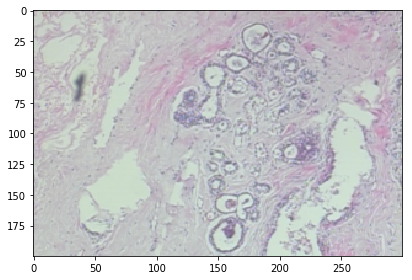

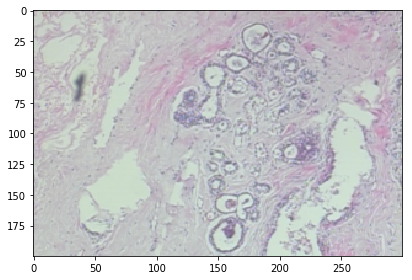

In [6]:
img1 = ip.get_image(0, 0)
io.imshow(img1)

In [7]:
#imgs.keys()

In [8]:
#plot_images(imgs, save_title='question2.png', show = True)

In [9]:
ip.vectorize()
ip.vectorize_y() 
ip.img_attribs

img_lst2 len 82 should be 1  1 1
len of sub list 0 2 1
len of sub list 1 2 1
len of sub list 2 2 1
len of sub list 3 2 1
len of sub list 4 2 1
len of sub list 5 2 1
len of sub list 6 2 1
len of sub list 7 2 1
len of sub list 8 2 1
len of sub list 9 2 1
len of sub list 10 2 1
len of sub list 11 2 1
len of sub list 12 2 1
len of sub list 13 2 1
len of sub list 14 2 1
len of sub list 15 2 1
len of sub list 16 2 1
len of sub list 17 2 1
len of sub list 18 2 1
len of sub list 19 2 1
len of sub list 20 2 1
len of sub list 21 2 1
len of sub list 22 2 1
len of sub list 23 2 1
len of sub list 24 2 1
len of sub list 25 2 1
len of sub list 26 2 1
len of sub list 27 2 1
len of sub list 28 2 1
len of sub list 29 2 1
len of sub list 30 2 1
len of sub list 31 2 1
len of sub list 32 2 1
len of sub list 33 2 1
len of sub list 34 2 1
len of sub list 35 2 1
len of sub list 36 2 1
len of sub list 37 2 1
len of sub list 38 2 1
len of sub list 39 2 1
len of sub list 40 2 1
len of sub list 41 2 1
len of sub 

{'SOB_B_A-14-22549AB-40-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (200, 300, 3),
  'mag': '40',
  'seq': '001',
  'slide_id': '22549AB',
  'tumor_class': 'B',
  'tumor_type': 'A',
  'year': '14'},
 'SOB_B_A-14-22549CD-40-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (200, 300, 3),
  'mag': '40',
  'seq': '001',
  'slide_id': '22549CD',
  'tumor_class': 'B',
  'tumor_type': 'A',
  'year': '14'},
 'SOB_B_A-14-22549G-40-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (200, 300, 3),
  'mag': '40',
  'seq': '001',
  'slide_id': '22549G',
  'tumor_class': 'B',
  'tumor_type': 'A',
  'year': '14'},
 'SOB_B_A-14-29960CD-40-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (200, 300, 3),
  'mag': '40',
  'seq': '001',
  'slide_id': '29960CD',
  'tumor_class': 'B',
  'tumor_type': 'A',
  'year': '14'},
 'SOB_B_F-14-14134-40-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (200, 300, 3),
  'mag': '40',
  'seq': '001',
  'slide_id': '14134',
  'tumor_class': 'B',

getting sample of type LC
outer_i <class 'int'> 65
found fn SOB_M_LC-14-15570C-40-001.png at nested index [65] [0]


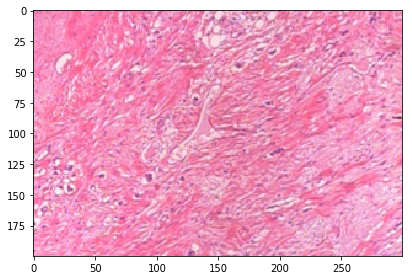

getting sample of type A
outer_i <class 'int'> 3
found fn SOB_B_A-14-29960CD-40-001.png at nested index [3] [0]


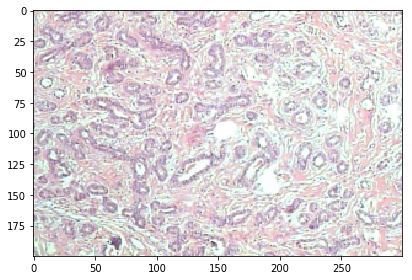

getting sample of type F
outer_i <class 'int'> 7
found fn SOB_B_F-14-21998EF-40-001.png at nested index [7] [0]


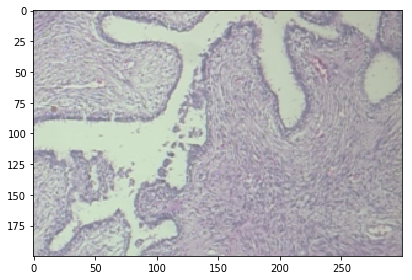

getting sample of type MC
outer_i <class 'int'> 73
found fn SOB_M_MC-14-18842D-40-001.png at nested index [73] [0]


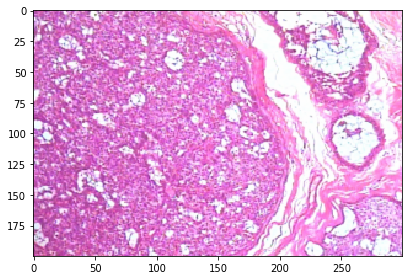

getting sample of type PC
outer_i <class 'int'> 81
found fn SOB_M_PC-15-190EF-40-001.png at nested index [81] [0]


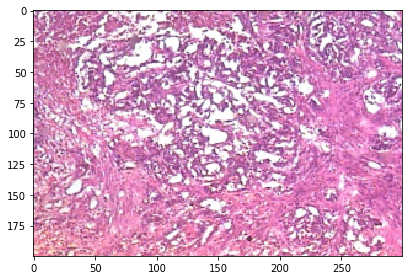

getting sample of type DC
outer_i <class 'int'> 57
found fn SOB_M_DC-14-5694-40-001.png at nested index [57] [0]


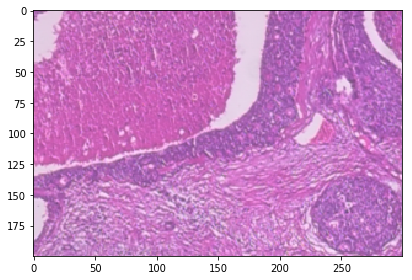

getting sample of type PT
outer_i <class 'int'> 15
found fn SOB_B_PT-14-22704-40-001.png at nested index [15] [0]


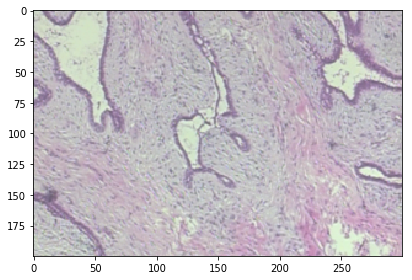

getting sample of type TA
outer_i <class 'int'> 20
found fn SOB_B_TA-14-16184CD-40-001.png at nested index [20] [0]


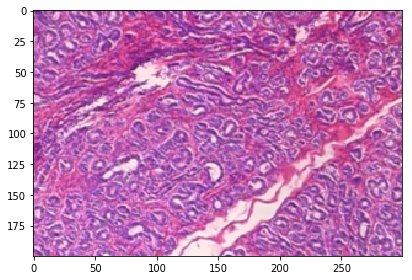

returning 8 sample images in list shape (200, 300, 3)


In [10]:
imgs = ip.get_one_of_each()

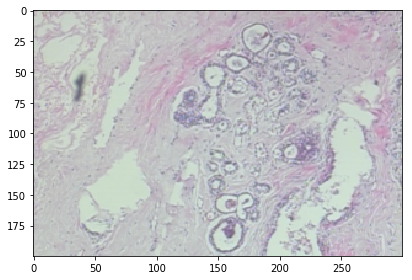

In [11]:
img1 = ip.get_image(0, 0)

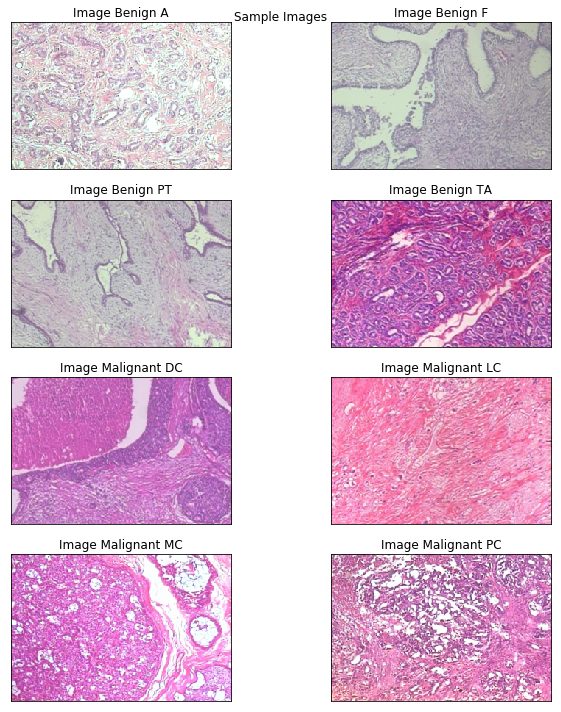

In [12]:
plot_images(imgs, labels=['Malignant DC', 'Malignant MC', 'Benign A', 'Benign TA', 'Benign F', 'Malignant PC', 'Malignant LC', 'Benign PT']);

In [13]:
tumor_types = {'DC', 'LC', 'MC', 'PC', 'A', 'F', 'PT', 'TA'}

In [14]:
print('zip {}'.format(dict(zip(tumor_types, imgs))))

zip {'PC': 'SOB_M_DC-14-5694-40-001.png', 'PT': 'SOB_M_PC-15-190EF-40-001.png', 'DC': 'SOB_B_TA-14-16184CD-40-001.png', 'LC': 'SOB_B_A-14-29960CD-40-001.png', 'A': 'SOB_B_F-14-21998EF-40-001.png', 'F': 'SOB_M_MC-14-18842D-40-001.png', 'TA': 'SOB_B_PT-14-22704-40-001.png', 'MC': 'SOB_M_LC-14-15570C-40-001.png'}


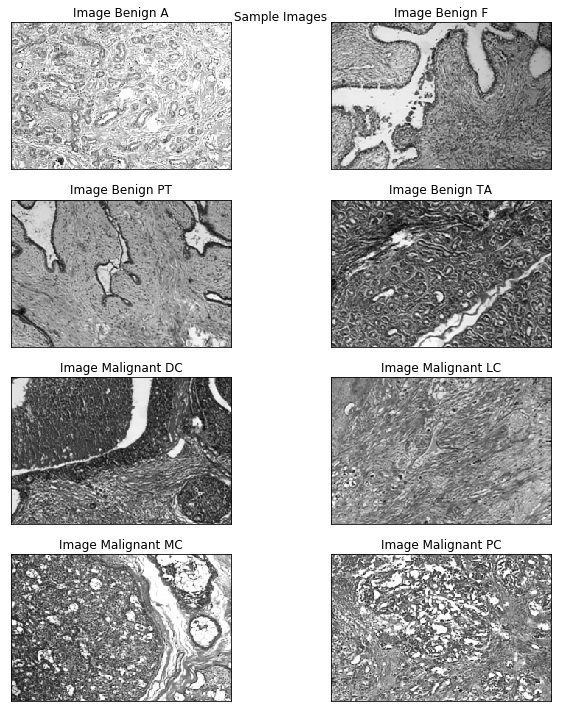

In [17]:
img_dict = imgs
gray_imgs = get_grayscale(img_dict)
plot_images(gray_imgs, labels=['Malignant DC', 'Malignant MC', 'Benign A', 'Benign TA', 'Benign F', 'Malignant PC', 'Malignant LC', 'Benign PT']);

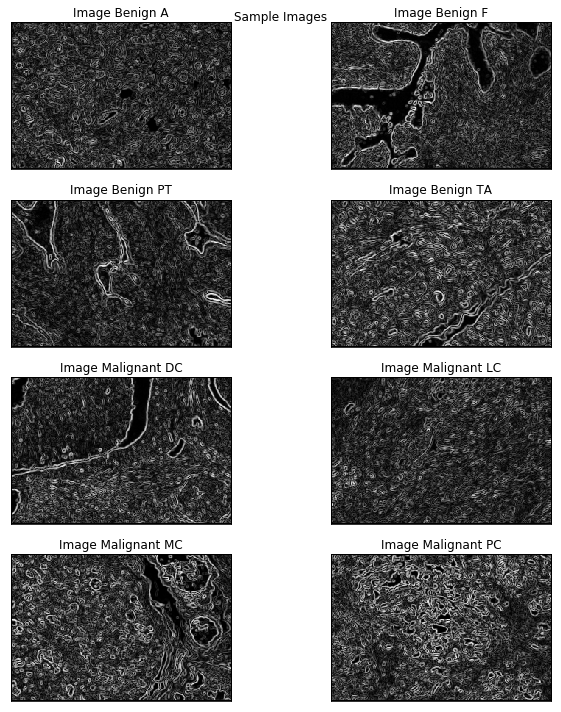

In [19]:

sobel_imgs = apply_filter(gray_imgs, img_filter = sobel, save_title='sobel_imgs.png', show_bool = False)
plot_images(sobel_imgs, labels=['Malignant DC', 'Malignant MC', 'Benign A', 'Benign TA', 'Benign F', 'Malignant PC', 'Malignant LC', 'Benign PT']);

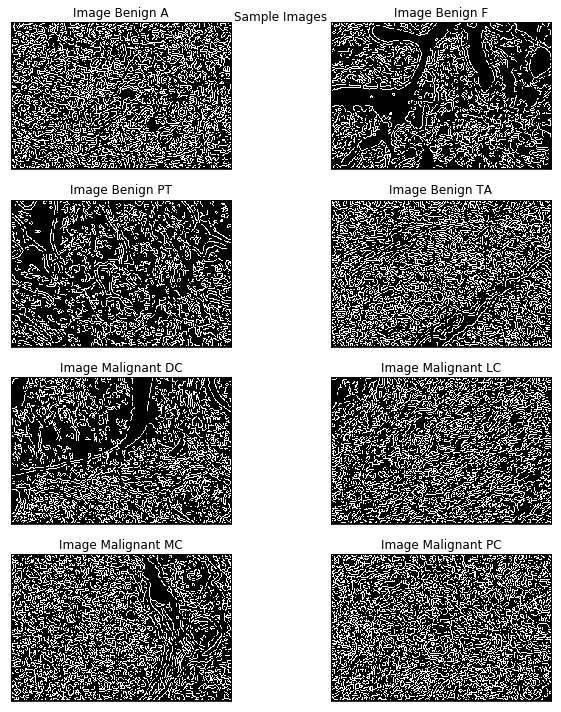

In [20]:
canny_imgs = apply_filter(gray_imgs, img_filter = canny, save_title='canny_imgs.png', show_bool = False)
plot_images(canny_imgs, labels=['Malignant DC', 'Malignant MC', 'Benign A', 'Benign TA', 'Benign F', 'Malignant PC', 'Malignant LC', 'Benign PT']);


Sigma: 0
Sigma: 0
Sigma: 0
Sigma: 0


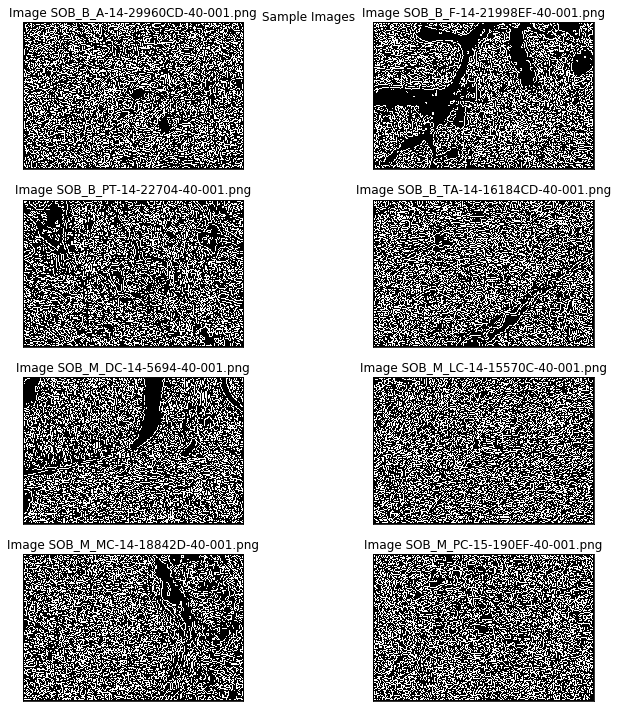

Sigma: 1
Sigma: 1
Sigma: 1
Sigma: 1


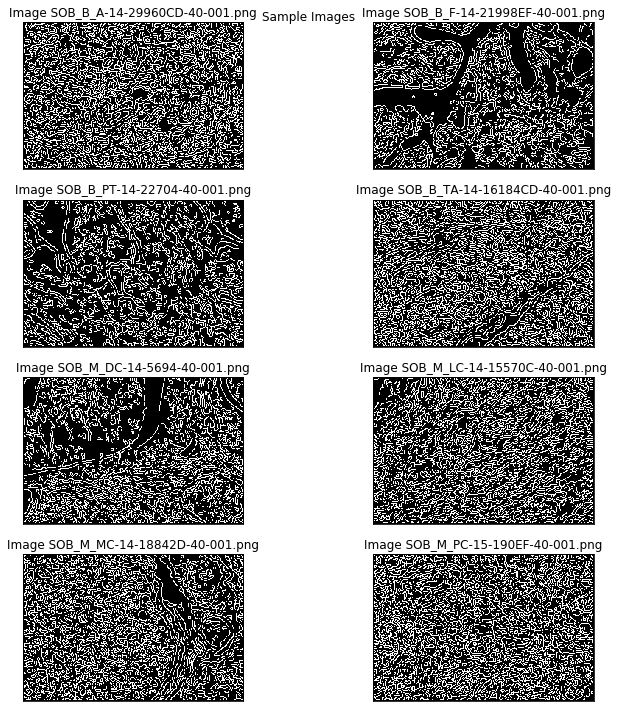

Sigma: 2
Sigma: 2
Sigma: 2
Sigma: 2


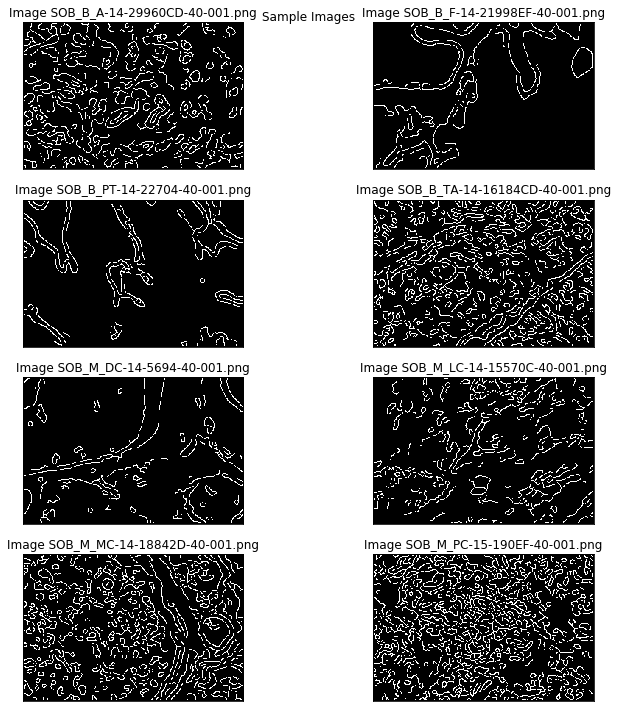

Sigma: 3
Sigma: 3
Sigma: 3
Sigma: 3


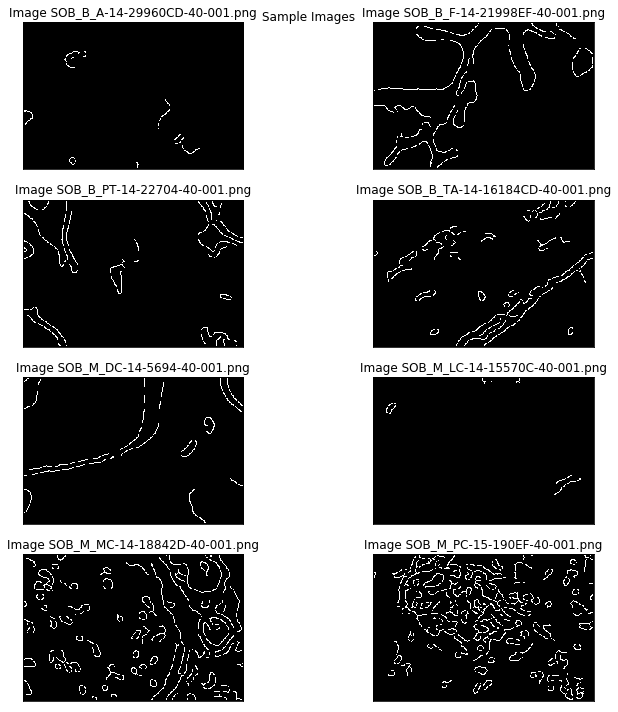

Sigma: 4
Sigma: 4
Sigma: 4
Sigma: 4


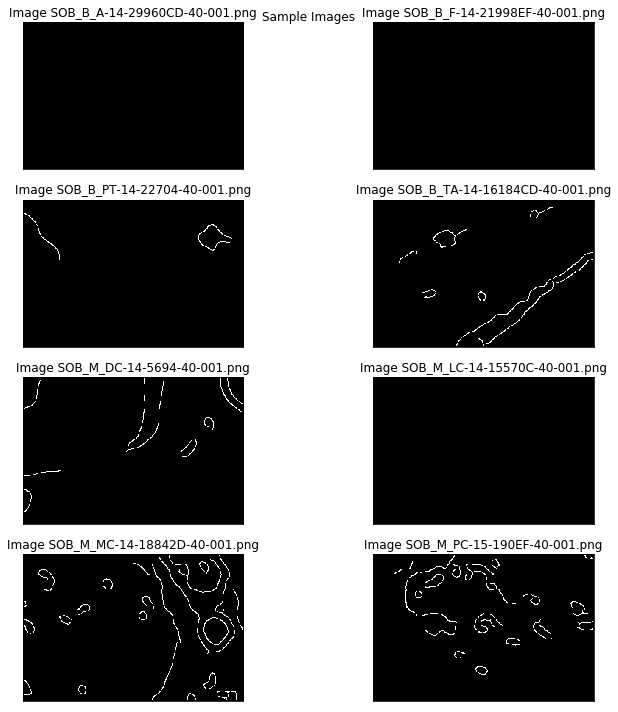

In [21]:
test_canny_sigma(gray_imgs)

tv_chambolle denoising
Sigma, spatial: 0.3


<Figure size 432x288 with 0 Axes>

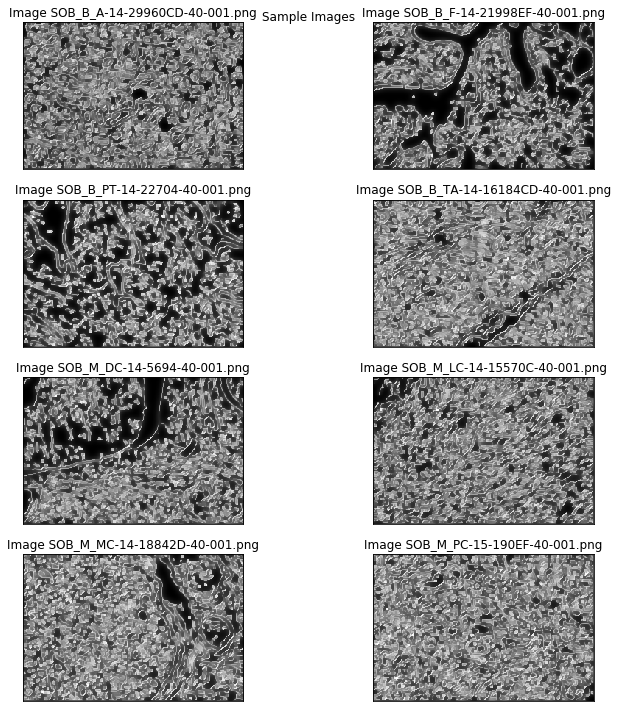

Sigma, spatial: 0.8400000000000001


<Figure size 432x288 with 0 Axes>

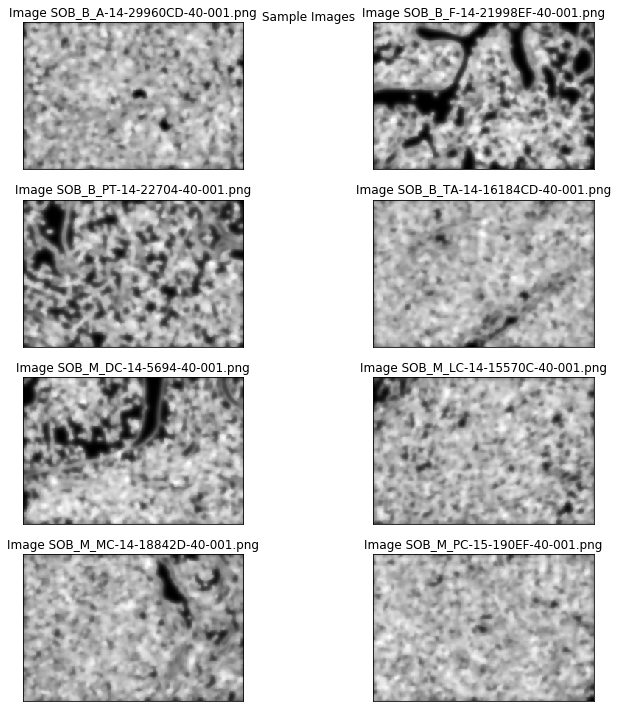

Sigma, spatial: 1.3800000000000001


<Figure size 432x288 with 0 Axes>

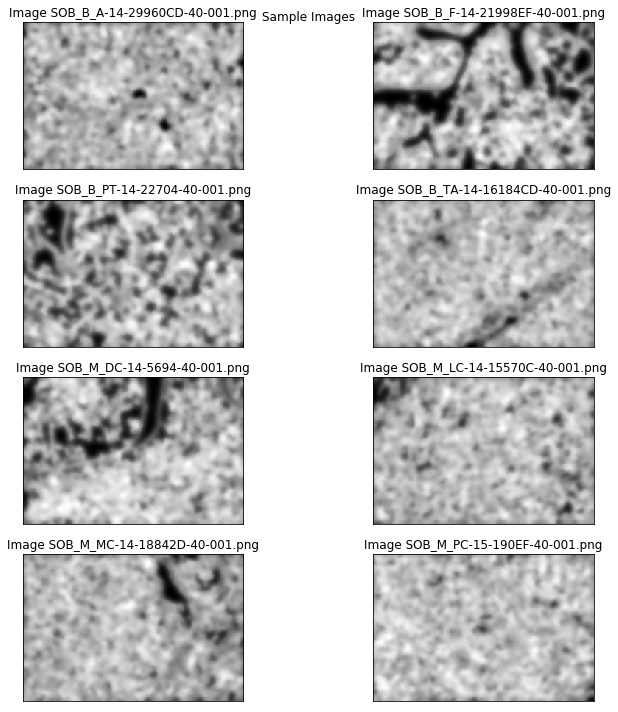

Sigma, spatial: 1.9200000000000002


<Figure size 432x288 with 0 Axes>

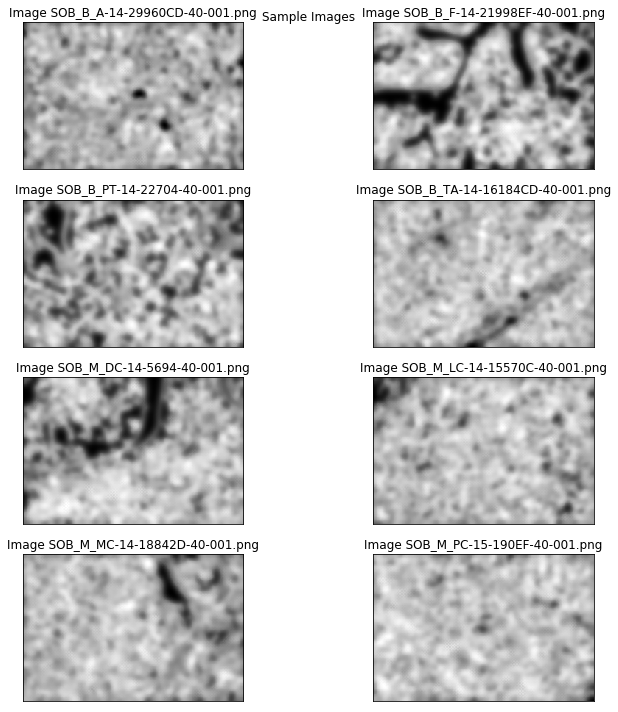

Sigma, spatial: 2.46


<Figure size 432x288 with 0 Axes>

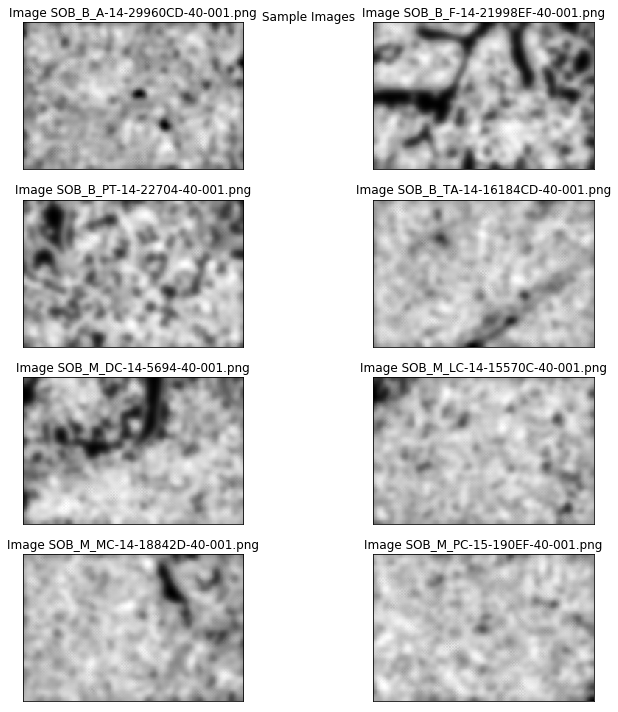

In [28]:
imgs_den = test_denoise(gray_imgs, denoise = denoise_tv_chambolle, save_title='denoise_chambolle.png', show_bool = True)
#tv_chambolle denoising
#Sigma 1, spatial: 0.3 is pretty nice

bilateral denoising
Sigma, spatial: 0.2


<Figure size 432x288 with 0 Axes>

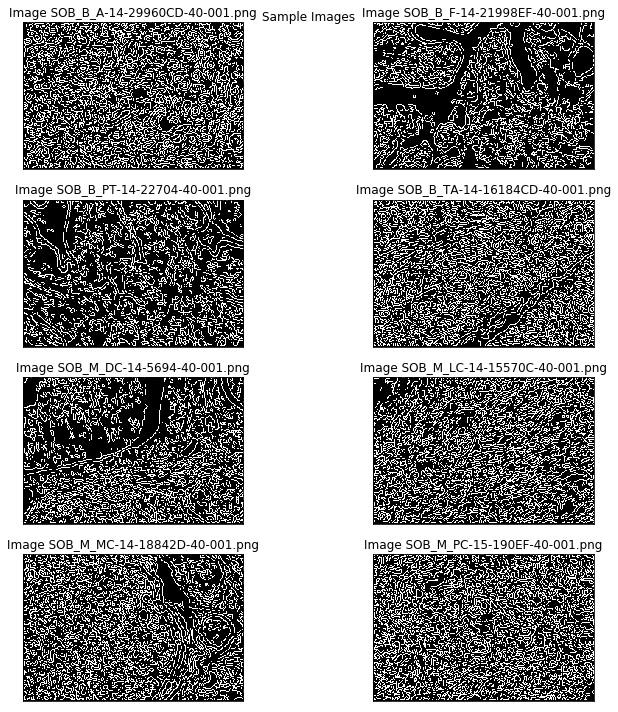

Sigma, spatial: 0.4


<Figure size 432x288 with 0 Axes>

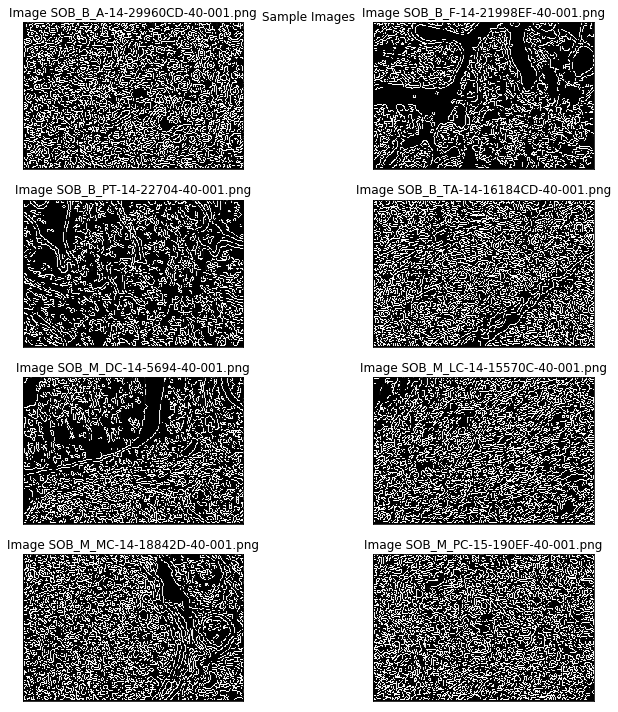

Sigma, spatial: 0.6000000000000001


<Figure size 432x288 with 0 Axes>

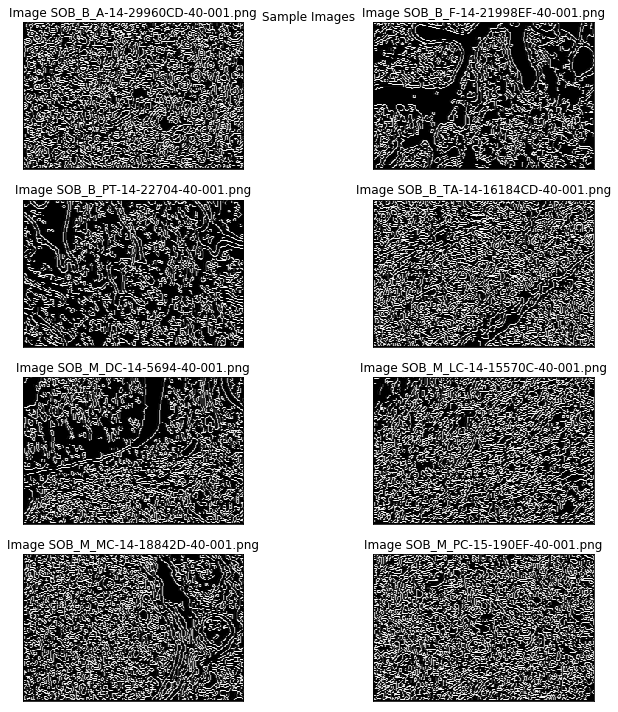

Sigma, spatial: 0.8


<Figure size 432x288 with 0 Axes>

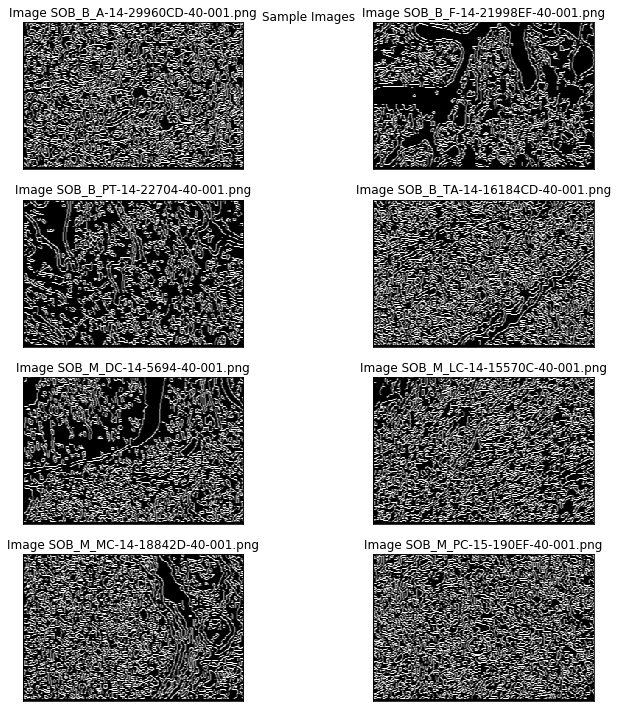

In [30]:
imgs_den_bilat = test_denoise(gray_imgs, denoise = denoise_bilateral, save_title='denoise_bilateral.png', show_bool = True)



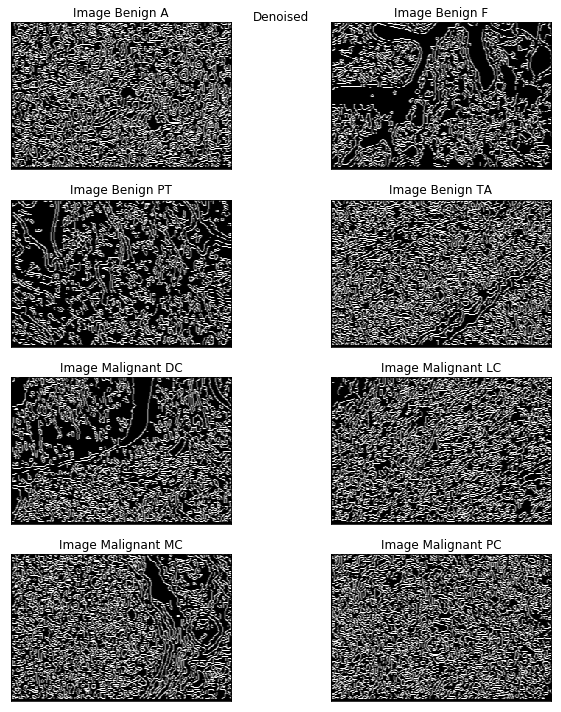

In [25]:
plot_images(imgs_den, labels=['Malignant DC', 'Malignant MC', 'Benign A', 'Benign TA', 'Benign F', 'Malignant PC', 'Malignant LC', 'Benign PT'], Title = 'Denoised');

